c:\Users\Shaikh Abdul Rafay\anaconda3\Lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu"


0: 480x640 1 tv, 1 laptop, 1 mouse, 1 keyboard, 35.7ms
Speed: 0.0ms preprocess, 35.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


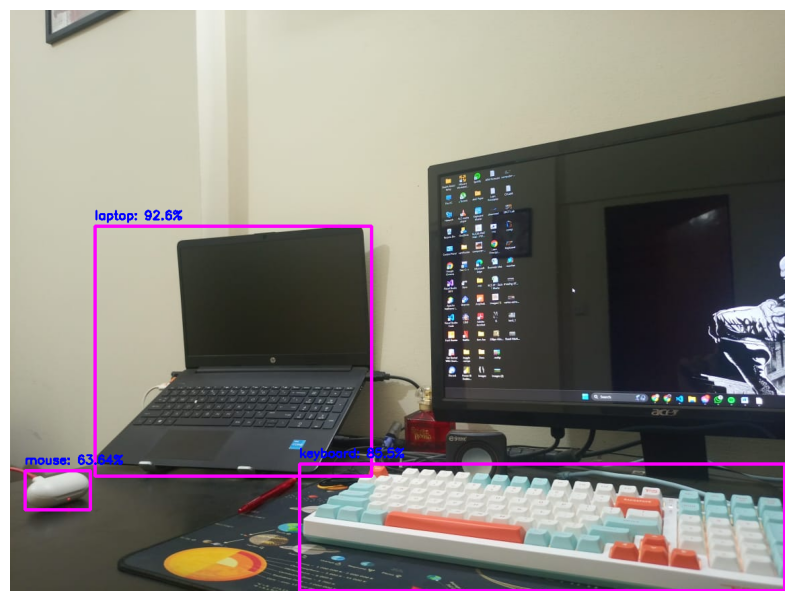

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a YOLOv8 model (pre-trained on COCO dataset)
model = YOLO('yolov8n.pt')  # You can replace 'n' with other sizes (s, m, l, x)

# Read the image
img = cv2.imread(r"C:\Users\Shaikh Abdul Rafay\Downloads\WhatsApp Image 2024-09-30 at 19.42.09_158b99e4.jpg")

# Detect objects in the image
results = model(img)

# Class names in COCO dataset
classNames = model.names

# Define the specific classes we are interested in
desired_classes = ['keyboard', 'laptop', 'mouse', 'monitor'  ] 

# Process results
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])
        class_name = classNames[cls]

        if class_name in desired_classes:
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw the bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # Add class label and confidence
            confidence = round(float(box.conf[0]) * 100, 2)
            label = f"{class_name}: {confidence}%"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
